<a href="https://colab.research.google.com/github/sifatsyed/DfsBfsAndGraphImplementation/blob/main/BFSandDFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
class Node:
    def __init__(self, value):
        self.value = value
        self.neighbors = []

    def add_edge_to_node(self, neighbor):
        self.neighbors.append(neighbor)

    def __str__(self):
        return f"{self.value}: {[neighbor.value for neighbor in self.neighbors]}"

class Graph:
    def __init__(self):
        self.nodes = {}

    def add_node(self, value):
        if value not in self.nodes:
            self.nodes[value] = Node(value)

    def get_node(self, value):
        return self.nodes.get(value)

    def add_edge(self, value1, value2):
        if value1 in self.nodes and value2 in self.nodes:
            self.nodes[value1].add_edge_to_node(self.nodes[value2])
            self.nodes[value2].add_edge_to_node(self.nodes[value1])
        else:
            print(f"Error: One or both of the nodes '{value1}' or '{value2}' do not exist.")

    def print_graph(self):
        for node in self.nodes.values():
            print(node)

# Create a graph instance
g = Graph()

# Add nodes
g.add_node("5")
g.add_node("12")
g.add_node("0")
g.add_node("7")
g.add_node("1")
g.add_node("3")
g.add_node("60")

# Add edges
g.add_edge("5", "12")
g.add_edge("5", "0")
g.add_edge("12", "7")
g.add_edge("12", "1")
g.add_edge("0", "3")
g.add_edge("0", "60")
# Print the graph
g.print_graph()

5: ['12', '0']
12: ['5', '7', '1']
0: ['5', '3', '60']
7: ['12']
1: ['12']
3: ['0']
60: ['0']


In [3]:
from collections import deque

def BFS(nodes, startNode):
    # could also be a set if no negatives or a map???
    visited = ["5", "12", "0", "1", "7", "3", "60"]
    visMap = {visit: False for visit in visited}
    # store the whole node in visited, less mem I guess

    vis = []
    q = deque() # creating a queue, let's see if this works for us

    first_node = nodes.get_node(startNode)
    q.append(first_node)
    visMap[first_node.value] = True
    # vis.append(startNode)

    while q:
        c = q.popleft()
        print(c.value)
        for neighbor in c.neighbors:
            # print(neighbor.value)
            if visMap[neighbor.value] is False:
                q.append(neighbor)
                visMap[neighbor.value] = True

BFS(g, "5")

5
12
0
7
1
3
60


In [10]:
# DFS implementation in a Adjancency List (iteratively)
def DFS(nodes, startNode):
    # {key: False for key in original_map}
    marked = {key: False for key in nodes.nodes}

    first_node = nodes.get_node(startNode)
    stk = deque()
    stk.append(first_node)

    while stk:
        c = stk.pop()
        marked[c.value] = True
        print(c.value)

        for n in c.neighbors:
            if marked[n.value] is False:
                stk.append(n)

DFS(g, "5")

5
0
60
3
12
1
7


In [11]:
# DFS implementation in a Adjancency List (iteratively)
marked = {key: False for key in g.nodes}

def DFS_Recur(nodes, startNode):
    node = nodes.get_node(startNode)
    print(node.value)
    marked[node.value] = True

    for n in node.neighbors:
        if marked[n.value] is False:
            DFS_Recur(nodes, node)

DFS(g, "5")

5
0
60
3
12
1
7


In [25]:
from collections import deque

class Graph_AM:
    def __init__(self, size):
        self.size = size
        self.adjacency_matrix = [[0] * size for _ in range(size)]

    def add_edge(self, u, v):
        self.adjacency_matrix[u][v] = 1
        self.adjacency_matrix[v][u] = 1  # For undirected graph

    def print_adjacency_matrix(self):
        print("Adjacency Matrix:")
        for row in self.adjacency_matrix:
            print(" ".join(map(str, row)))

# Example Usage
size = 7  # Number of nodes
graph_am = Graph_AM(size)

# Adding edges to the graph
edges = [
    (0, 1), (0, 2), (1, 3), (1, 4),
    (2, 5), (2, 6)
]

for u, v in edges:
    graph_am.add_edge(u, v)

graph_am.print_adjacency_matrix()

Adjacency Matrix:
0 1 1 0 0 0 0
1 0 0 1 1 0 0
1 0 0 0 0 1 1
0 1 0 0 0 0 0
0 1 0 0 0 0 0
0 0 1 0 0 0 0
0 0 1 0 0 0 0


In [26]:
def BFS_AM(adjacency_matrix, start, size):
    marked = [False] * size

    q = deque()
    q.append(start)
    marked[start] = True

    while q:
        current = q.popleft()
        print(current)

        for j in range(size):
            if adjacency_matrix[current][j] == 1 and marked[j] is False:
                q.append(j)
                marked[j] = True

BFS_AM(graph_am.adjacency_matrix, 0, 7)


0
1
2
3
4
5
6


In [29]:
def DFS_AM(adjacency_matrix, start, size):
    marked = [False] * size

    q = deque()
    q.append(start)

    while q:
        current = q.pop()
        print(current)
        marked[current] = True

        for j in range(size):
            if adjacency_matrix[current][j] == 1 and marked[j] is False:
                q.append(j)

DFS_AM(graph_am.adjacency_matrix, 0, 7)

0
2
6
5
1
4
3


In [30]:
size = 7
marked = [False] * size

def DFS_AM_Rec(adjacency_matrix, start, size):
        print(start)
        marked[start] = True

        for j in range(size):
            if adjacency_matrix[start][j] == 1 and marked[j] is False:
                DFS_AM_Rec(adjacency_matrix, j, size)

DFS_AM(graph_am.adjacency_matrix, 0, size)

0
2
6
5
1
4
3


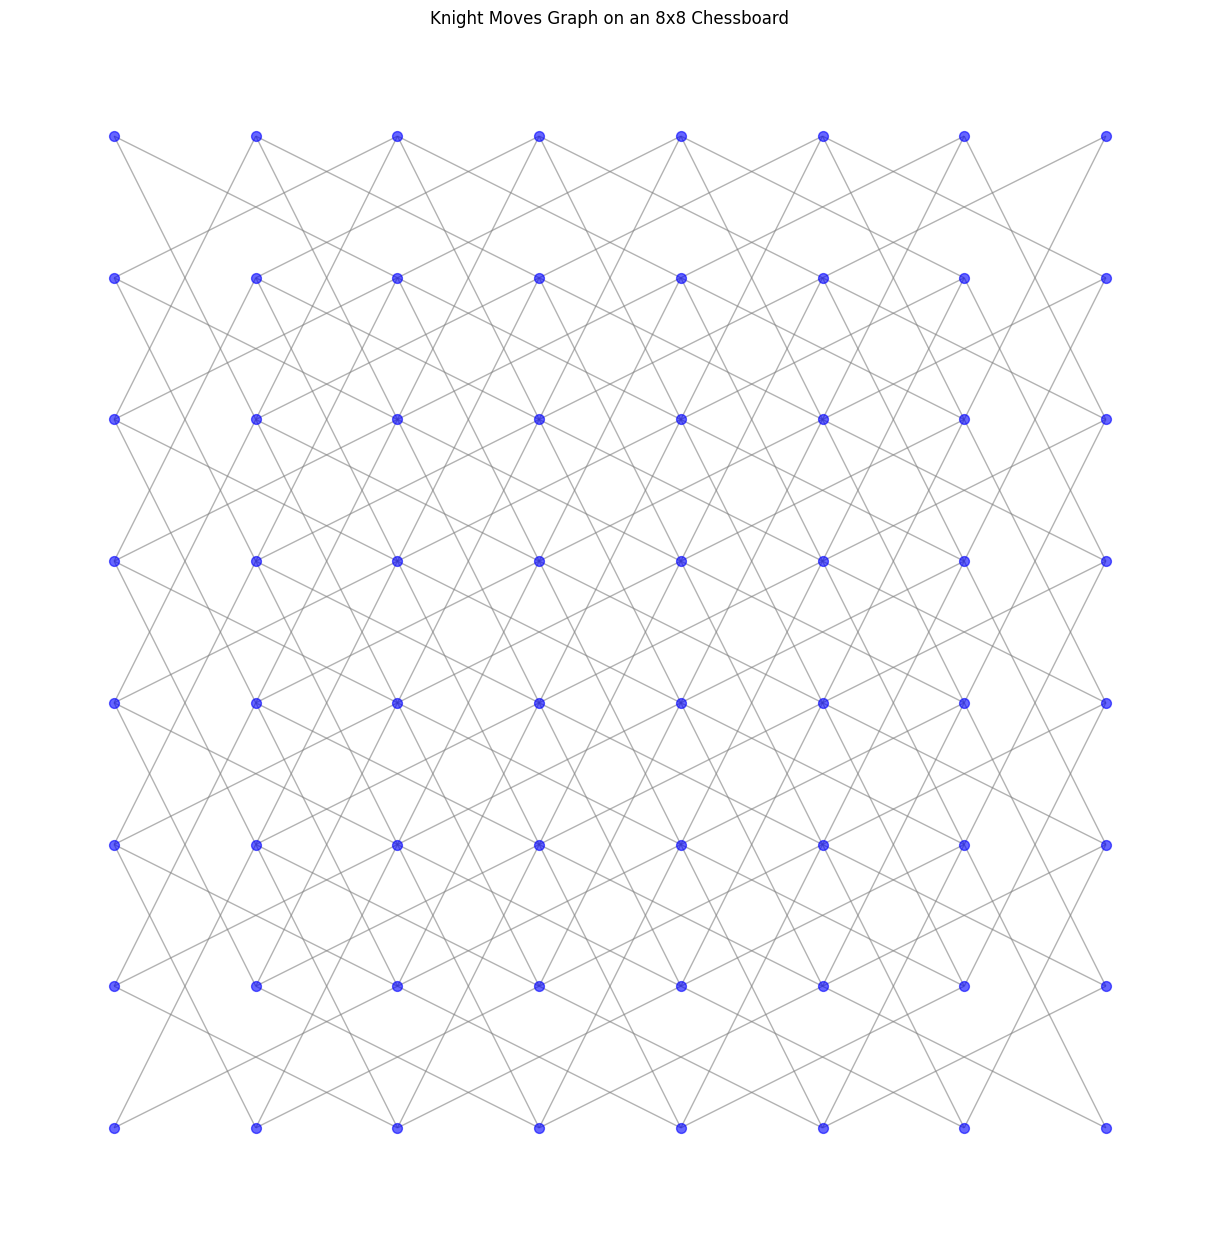

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

def create_knight_graph():
    G = nx.Graph()
    size = 8

    # Define knight moves
    knight_moves = [
        (2, 1), (2, -1), (-2, 1), (-2, -1),
        (1, 2), (1, -2), (-1, 2), (-1, -2)
    ]

    def position_to_index(row, col):
        return row * size + col

    # Add nodes
    for row in range(size):
        for col in range(size):
            index = position_to_index(row, col)
            G.add_node(index, pos=(col, size - row - 1))  # (x, y) coordinates for visualization

    # Add edges based on knight moves
    for row in range(size):
        for col in range(size):
            index = position_to_index(row, col)
            for move in knight_moves:
                new_row, new_col = row + move[0], col + move[1]
                if 0 <= new_row < size and 0 <= new_col < size:
                    new_index = position_to_index(new_row, new_col)
                    G.add_edge(index, new_index)

    return G

# Create the graph
G = create_knight_graph()

# Extract positions for plotting
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=False, node_size=50, node_color='blue', edge_color='gray', alpha=0.6)
plt.title('Knight Moves Graph on an 8x8 Chessboard')
plt.show()